In [11]:
data_dir = "Malicious URLs.csv"


In [9]:
# Common imports
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

print("\n Libraries Imported \n")



 Libraries Imported 



In [15]:

print("- Loading CSV Data -")
url_df = pd.read_csv(data_dir)

test_url = url_df['URLs'][4]

print("\n  CSV Data Loaded \n")


- Loading CSV Data -

### CSV Data Loaded ###



In [16]:

print(url_df)


                                                     URLs Class
0                         freebase.com/view/en/bob_sirois  good
1                          en.wikipedia.org/wiki/Joie_Lee  good
2                pipl.com/directory/people/Rejean/Beaudin  good
3       flickr.com/photos/teneyck/sets/72157610336209297/  good
4       ussoccer.com/News/Federation-Services/2009/06/...  good
...                                                   ...   ...
420459  ourorigins.org/genealogielistfirstname.aspx?an...  good
420460    simira.co.id/cifk/live.com/Account_Verified.htm   bad
420461  kstatesports.com/sports/w-baskbl/spec-rel/ksu-...  good
420462  vh1.com/video/living-colour/9128/cult-of-perso...  good
420463     absoluteastronomy.com/topics/SummerSlam_(1990)  good

[420464 rows x 2 columns]


In [17]:

test_percentage = .2

train_df, test_df = train_test_split(
    url_df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']

print("\n Split Complete \n")



### Split Complete ###



- Counting Splits -
Training Samples: 336371
Testing Samples: 84093


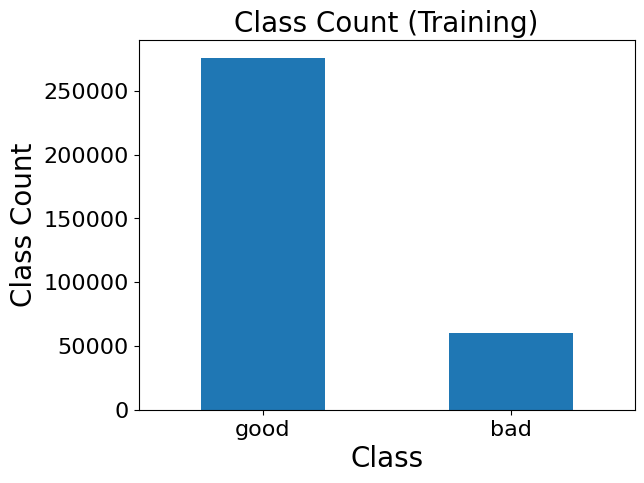

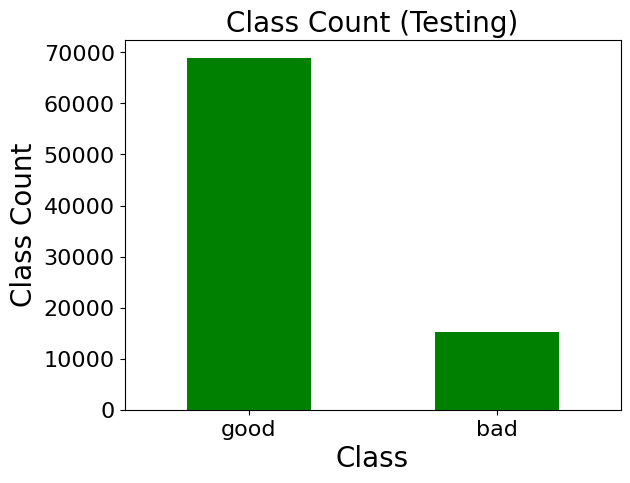

In [18]:

print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))


count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()


In [19]:


def tokenizer(url):
    """Separates feature words from the raw data
    Keyword arguments:
      url ---- The full URL

    :Returns -- The tokenized words; returned as a list
    """

    # Split by slash (/) and dash (-)
    tokens = re.split('[/-]', url)

    for i in tokens:
        # Include the splits extensions and subdomains
        if i.find(".") >= 0:
            dot_split = i.split('.')

            # Remove .com and www. since they're too common
            if "com" in dot_split:
                dot_split.remove("com")
            if "www" in dot_split:
                dot_split.remove("www")

            tokens += dot_split

    return tokens


print("\n Tokenizer defined \n")



 Tokenizer defined 



In [20]:

print("\n- Full URL -\n")
print(test_url)


print("\n- Tokenized Output -\n")
tokenized_url = tokenizer(test_url)
print(tokenized_url)



- Full URL -

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx

- Tokenized Output -

['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


Train the vectorizers
Create the count vectorizer cVec using the CountVectorizer function
Configure cVec to use the tokenizer function from earlier
Perform fit_transform on cVec to train the vectorizer with the training URLs
a. Save the result as count_X
Create the TF-IDF vectorizer tVec using the TfidfVectorizer function
Configure tVec to use the tokenizer function from earlier
Perform fit_transform on tVec to train the vectorizer with the training URLs
a. Save the result as tfidf_X


In [21]:
print("- Training Count Vectorizer -")
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

print("- Training TF-IDF Vectorizer -")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])


print("\n Vectorizing Complete \n")


- Training Count Vectorizer -
- Training TF-IDF Vectorizer -

 Vectorizing Complete 



In [22]:
# Manually perform term count on test_url
for i in list(dict.fromkeys(tokenized_url)):
    print("{} - {}".format(tokenized_url.count(i), i))


1 - ussoccer.com
1 - News
1 - Federation
1 - Services
1 - 2009
1 - 06
1 - University
1 - Of
1 - Miami
1 - President
1 - Donna
1 - E
1 - Shalala
1 - Joins
1 - Team
2 - To
1 - Bring
1 - FIFA
1 - World
1 - Cup
1 - United
1 - States
1 - In.aspx
1 - ussoccer
1 - In
1 - aspx


In [23]:
example_cVec = CountVectorizer(tokenizer=tokenizer)
example_X = example_cVec.fit_transform([test_url])

print("\n- Count Vectorizer (Test URL) -\n")
print(example_X)

print()
print("=" * 50)
print()

example_tVec = TfidfVectorizer(tokenizer=tokenizer)
example_X = example_tVec.fit_transform([test_url])

print("\n- TFIDF Vectorizer (Test URL) -\n")
print(example_X)



- Count Vectorizer (Test URL) -

  (0, 24)	1
  (0, 13)	1
  (0, 7)	1
  (0, 16)	1
  (0, 1)	1
  (0, 0)	1
  (0, 22)	1
  (0, 14)	1
  (0, 12)	1
  (0, 15)	1
  (0, 5)	1
  (0, 6)	1
  (0, 17)	1
  (0, 11)	1
  (0, 19)	1
  (0, 20)	2
  (0, 3)	1
  (0, 8)	1
  (0, 25)	1
  (0, 4)	1
  (0, 21)	1
  (0, 18)	1
  (0, 10)	1
  (0, 23)	1
  (0, 9)	1
  (0, 2)	1



- TFIDF Vectorizer (Test URL) -

  (0, 2)	0.18569533817705186
  (0, 9)	0.18569533817705186
  (0, 23)	0.18569533817705186
  (0, 10)	0.18569533817705186
  (0, 18)	0.18569533817705186
  (0, 21)	0.18569533817705186
  (0, 4)	0.18569533817705186
  (0, 25)	0.18569533817705186
  (0, 8)	0.18569533817705186
  (0, 3)	0.18569533817705186
  (0, 20)	0.3713906763541037
  (0, 19)	0.18569533817705186
  (0, 11)	0.18569533817705186
  (0, 17)	0.18569533817705186
  (0, 6)	0.18569533817705186
  (0, 5)	0.18569533817705186
  (0, 15)	0.18569533817705186
  (0, 12)	0.18569533817705186
  (0, 14)	0.18569533817705186
  (0, 22)	0.18569533817705186
  (0, 0)	0.18569533817705186
  (0, 1

## Task 3 - Vectorize the testing data

1. Use **cVec** to _transform_ **test_df['URLs']**\
   a. Save the result as **test_count_X**

2. Use **tVec** to _transform_ **test_df['URLs']**\
   a. Save the result as **test_tfidf_X**


In [25]:
print("- Count Vectorizer -")
test_count_X = cVec.transform(test_df['URLs'])

print("- TFIDF Vectorizer -")
test_tfidf_X = tVec.transform(test_df['URLs'])


print("\n Vectorizing Complete \n")


- Count Vectorizer -
- TFIDF Vectorizer -

 Vectorizing Complete 



In [26]:
def generate_report(cmatrix, score, creport):
    """Generates and displays graphical reports
    Keyword arguments:
      cmatrix - Confusion matrix generated by the model
      score --- Score generated by the model
      creport - Classification Report generated by the model

    :Returns -- N/A
    """

    # Generate confusion matrix heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(cmatrix,
                annot=True,
                fmt="d",
                linewidths=.5,
                square=True,
                cmap='Blues',
                annot_kws={"size": 16},
                xticklabels=['bad', 'good'],
                yticklabels=['bad', 'good'])

    plt.xticks(rotation='horizontal', fontsize=16)
    plt.yticks(rotation='horizontal', fontsize=16)
    plt.xlabel('Actual Label', size=20)
    plt.ylabel('Predicted Label', size=20)

    title = 'Accuracy Score: {0:.4f}'.format(score)
    plt.title(title, size=20)

    # Display classification report and confusion matrix
    print(creport)
    plt.show()


In [20]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
svm_tfidf = svm()
svm_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_svm_tfidf = svm_tfidf.score(test_tfidf_X, test_labels)
predictions_svm_tfidf = svm_tfidf.predict(test_tfidf_X)
cmatrix_svm_tfidf = confusion_matrix(predictions_svm_tfidf, test_labels)
creport_svm_tfidf = classification_report(predictions_svm_tfidf, test_labels)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)


NameError: name 'svm' is not defined